Dropdown(description='HDB Town:', options=('Select a town', 'Ang Mo Kio', 'Bedok', 'Bukit Batok', 'Bukit Merah…

<IPython.core.display.Javascript object>


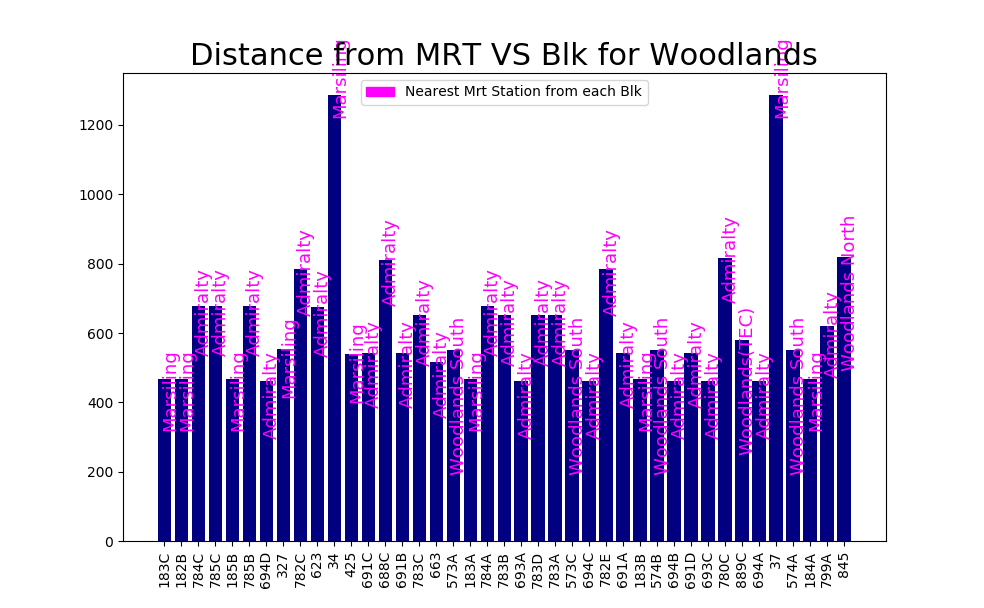

In [11]:
# want to explain per blk, what is the distance to nearest mrt, and we want to find its nearest corresponding MRT

# assumptions : Those that are MRT stations, the word "MRT" is omitted, but if LRT stations, the word "LRT" will be included
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import parseUnitDetails
import matplotlib.patches as mpatches
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets


#  4-Room and 5-room flats available for Nov 2018 Sale of balance flats
# import the csv file for unitdetails datasets

unitDetails = parseUnitDetails.getUnitDetails()

#list of the 22 towns which participated in NOV 2018 HDB SBF
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

# defining names
rmType= unitDetails['rmType']



## Set up UI
# selection UI
allTownsWithSelectTxt = ['Select a town']
allTownsWithSelectTxt.extend(allTowns)
wTownDropdown = widgets.Dropdown(
    options=allTownsWithSelectTxt,
    value=allTownsWithSelectTxt[0], # 'select a town'
    description='HDB Town:',
    disabled=False,
)

def wTownDropdown_onChange(selectedTown):
    newTown = selectedTown.owner.value
    #print('f: ', newTown)
    if not (newTown == 'Select a town'):
        #print('to plot town:', newTown)
        plotDistVsBlkByTown(newTown)
    #return selectedTown

wTownDropdown.observe(wTownDropdown_onChange)
display(wTownDropdown) # display the drop down box



##############################################

# Gathering data for town, distance and Mrt

# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes


#plt.figure(figsize=(4,2))
plt.figure(figsize=(8,5))  # Change the default plt size

def plotDistVsBlkByTown(town):
    distToMrt =[]
    nearestMrt =[]
    blkNum=[]
    for unit in unitDetails[unitDetails['town'] == town]:
        distToMrt.append(unit['DistToMrt'])
        nearestMrt.append(unit['NearestMrt']) 
        blkNum.append(unit['blk'])
    listTog = zip(blkNum,distToMrt,nearestMrt)
    listTog = set(listTog)
    
    
    # After make sure ordered, we take out columns one by one again #
    blkNumOrdered = []
    distOrdered =[]
    nearestMRTOrdered =[]
    
    for alist in listTog:
        blkNumOrdered.append(alist[0])
        distOrdered.append(alist[1])
        nearestMRTOrdered.append(alist[2])
    
    

    plt.clf()
    fig = plt.gcf()  #get current figure
    ax = plt.gca()

    ax.bar(blkNumOrdered, distOrdered,color='navy')
    plt.title('Distance from MRT VS Blk for {}'.format(town), fontsize =22)
    #plt.xlabel('Blk', fontsize =18)
    #plt.ylabel('Distance from MRT', fontsize =18)
    plt.xticks( rotation='vertical')
    #plt.ylim((0,max(distOrdered)+400))
    
    # Putting bar labels
    for i in range(len(blkNumOrdered)):
        ax.text(x = i-0.2 , y = distOrdered[i]+ distOrdered[i]*0.10 , s = nearestMRTOrdered[i], size = 13, color= 'Magenta',
                 rotation=90)
    # Putting legend to describe what the labels are
    magenta_patch = mpatches.Patch(color='magenta', label='Nearest Mrt Station from each Blk')
    ax.legend(handles=[magenta_patch])
    
 
    plt.show()
    

#print()
       
plotDistVsBlkByTown('Ang Mo Kio')  # default printing
plotDistVsBlkByTown('Bukit Panjang')   


# Some resources
#https://python-graph-gallery.com/10-barplot-with-number-of-observation/  
#https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html
#https://mplcursors.readthedocs.io/en/stable/examples/hover.html
#https://mplcursors.readthedocs.io/en/stable/examples/labeled_points.html
#https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
#https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html

